# Using Python to Numerically Solve a System of First-Order IVPs
> 11 January 2022: Initial version created by K. Oliveras


This Python Notebook demonstrates how to numerically solve the initial value problem $$y'' + \sin(y)=0, \qquad y(0) = \pi/4,~~ y'(0) = 0$$ using an explicit Runge-Kutta method of order 5(4) (Dormand,Prince).



## Preliminaries/Necessary Libraries
The following block of code loads the appropriate libraries needed to 
 1. use *Matlab-like* arrays `numpy`
 2. use `scipy`'s Runge-Kutta solver
 3. use `matplotlib` to create plots

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

%matplotlib inline

## Setting up and Solving the ODE
For all of our numerical methods to solve a differential equation of the form $\vec{x}' = \vec{f}(t,\vec{x})$ with $\vec{x}(t_0) = \vec{x}_0$, there are several ingredients that we need to provide

1. The initial conditions $t_0$ and $\vec{x}_0$ 
2. The final time when we would like to compute the solution $t_f$ 
3. The number of steps we would like to take \(N\) thus defining $\Delta t$ 
4. The $\vec{f}(t,\vec{x})$ corresponding to the differential equation we would like to solve.  For this step, we will need write the differential equation first as a system of first order differential equations.  

To do this, let $x_1(t) = y(t)$, and $x_2(t) = y'(t)$.  Differentiating these expressions gives us the system
\begin{align}
\dot{x}_1(t)&=x_2\\
\dot{x}_2(t)&=-\sin(x_1)
\end{align}
with the initial conditions $x_1(0) = \pi/4$ and $x_2(0) = 0$.  
Thus, our function $\vec{f}(t,\vec{x})$ is given by $$\vec{f}(t,\vec{x})=\begin{bmatrix}x_2\\-\sin(x_1)\end{bmatrix}$$

The following block of code declares the parameters and defines the function `ODEFun` that takes the input `t` (our independent variable) and `x` (our vector-valued dependent variable).

In [32]:
tSpan = [0,10]  # tSpan = [t_0 , t_f]
iniCond = [np.pi/4, 0] # iniCond = [y_0]
t = np.linspace(0,2*np.pi,30); # store equally spaced t values for evaluation later on.

def ODEFun(t,x):  # defining the function f(t,y)
    x1 = x[0]; x2 = x[1];
    return [x2,-np.sin(x1)]


Now that we have defined the variables, we can use `SciPy`'s `solve_ivp` command to numerically solve the ODE.  The documentation can be found at https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html




In [33]:
sol = solve_ivp(ODEFun, tSpan, iniCond, t_eval = t);

The solution is now stored in a structured `OdeResult` called `sol`.  If we use the command `print(sol)`, we can see exactly what is contained within the solution.

In [34]:
print(sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 92
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.        , 0.21666156, 0.43332312, 0.64998469, 0.86664625,
       1.08330781, 1.29996937, 1.51663094, 1.7332925 , 1.94995406,
       2.16661562, 2.38327719, 2.59993875, 2.81660031, 3.03326187,
       3.24992343, 3.466585  , 3.68324656, 3.89990812, 4.11656968,
       4.33323125, 4.54989281, 4.76655437, 4.98321593, 5.1998775 ,
       5.41653906, 5.63320062, 5.84986218, 6.06652374, 6.28318531])
 t_events: None
        y: array([[ 0.78539816,  0.76885192,  0.71978852,  0.63983493,  0.53193331,
         0.40035741,  0.25063322,  0.08934536, -0.07631175, -0.23855814,
        -0.38952751, -0.52277936, -0.63260706, -0.7146547 , -0.76597244,
        -0.78502212, -0.77088592, -0.72388632, -0.64576909, -0.53965724,
        -0.40962049, -0.26099319, -0.10017834,  0.06542837,  0.22782636,
         0.37969105,  0.514

The `OdeResult` will always store the output variable as `y`.  So if we want to simply view the output for our variable $x_1$, we need to only view the first row of the `y` vector.  This is done by simply typing the command `print(sol.y[0,:]`.  

*IMPORTANT*: Remember that python indexes starting at `0`.  Likewise,  `sol.y[0,:]` indicates that we want to view everything in the first row.  If we simply called `sol.y[0,0]`, we would only get the initial condition for $x_1$.  

In [35]:
print('The solution for x_1(t) for t = t_0 to t = t_f is: ')
print(sol.y[0,:]) # print all computed values for x_1

print('\n') # line break

print('The solution for x_1(t_0) (the initial condition) is: ')
print(sol.y[0,0]) # print the first value for x_1 (aka: the initial value)

The solution for x_1(t) for t = t_0 to t = t_f is: 
[ 0.78539816  0.76885192  0.71978852  0.63983493  0.53193331  0.40035741
  0.25063322  0.08934536 -0.07631175 -0.23855814 -0.38952751 -0.52277936
 -0.63260706 -0.7146547  -0.76597244 -0.78502212 -0.77088592 -0.72388632
 -0.64576909 -0.53965724 -0.40962049 -0.26099319 -0.10017834  0.06542837
  0.22782636  0.37969105  0.51417849  0.62561139  0.70951553  0.7629554 ]


The solution for x_1(t_0) (the initial condition) is: 
0.7853981633974483


## Plotting the solution

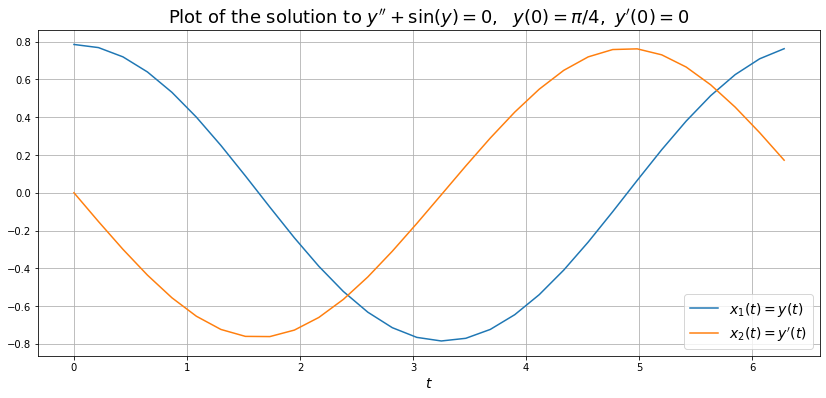

In [38]:
plt.figure(figsize=(14,6));  # creates a larger figure

plt.plot(sol.t,sol.y[0,:], label = r'$x_1(t) = y(t)$'); # plot the first component x_1
plt.plot(sol.t,sol.y[1,:], label = r'$x_2(t) = y^\prime(t)$'); # plot the second component x_2
    
plt.xlabel(r'$t$',fontsize=14) # label your axes!

plt.legend(fontsize = 14); # make the legend and use bigger fonts.
plt.title(r'Plot of the solution to $y^{\prime\prime} +\sin(y) = 0, ~~y(0) = \pi/4, ~ y^\prime(0) = 0$',fontsize=18); # title your graph!

plt.grid(); # put a grid on it :)
plt.show(); # show off your hard work

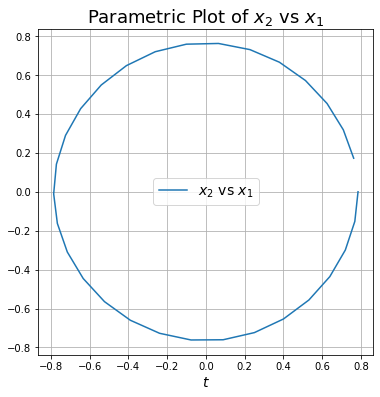

In [41]:
plt.figure(figsize=(6,6));  # creates a larger figure

plt.plot(sol.y[0,:], sol.y[1,:], label = r'$x_2$ vs $x_1$'); # plot the second component x_2
    
plt.xlabel(r'$t$',fontsize=14) # label your axes!

plt.legend(fontsize = 14); # make the legend and use bigger fonts.
plt.title(r'Parametric Plot of $x_2$ vs $x_1$',fontsize=18); # title your graph!

plt.grid(); # put a grid on it :)
plt.show(); # show off your hard work